# XGBoost Breakdown

- Boosting of Decision Trees
  - Sequentially built weak learners that tries to learn from errors of previous learner
- 
- ...


## Keywords

- <big>**Gradient-Boosting Machines (GBMs)**</big>
- ..

## Intuition

### Fundamental Ideas

- Gradient Boosting
  - building an ensemble of decision tree base learners wherein each base learner is trained successively,
  - attempts to predict the error—also known as “residual”—of the previous tree, and therefore compensate for it.
  - Its base learner trees are known as “weak learners” or “decision stumps.” They are generally very shallow. 
  
### Steps 

E.g. with just three trees (three weak leaners)

1. Fit 1st learner with original X and y `learner1.fit(X, y) `
   - Get prediction of $y_1$ as $\hat{y_1}$, `ŷ1` = learner1.predict(X)
   - **Prediction Error as `error1` = $y$ - $\hat{y_1}$`**
2. Fit 2nd learner with original X and 1st learner's error, `learner2.fit(X, error1)`
   - Get prediction of $y_2$ as $\hat{y_2}$, i.e. `ŷ2` = `learner2.predict(X)`
   - **Prediction Error as `error2` = $\hat{y_2}$ - `error1`**
     - I.e. difference between predicted and error of previous leaner, since this model is fitted with error of previous
3. Fit 3rd learner with original X and 2nd learner's error, `learner3.fit(X, error2)`
   - Get prediction of $y_3$ as $\hat{y_3}$, i.e. `ŷ3` = `learner3.predict(X)`
   - **Prediction Error as `error3` = $\hat{y_3}$ - `error2`**
4. After all weak learners are fitted, final Prediction for observations as aggregate results
     - `learner1.predict(X) + learner2.predict(X) + learner3.predict(X)`

- https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/9DV0V/more-about-gradient-boosting

## Caveats

-  GBM models are more resilient to high variance that results from overfitting the data due to being comprised of high-bias, low-variance weak learners. The bias of each weak learner in the final model is mitigated by the ensemble.  

## Sample Data

> Generate sample data for the algorithm


## Modelling with ...

- Using `scikit-learn` function
- Implementing with Python from Scratch
- ...

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
plt.rcParams["figure.figsize"] = (10, 4)
pd.set_option('display.max_columns', None)

In [4]:
from xgboost import (
    XGBClassifier,
    plot_importance
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    RocCurveDisplay
)

In [7]:
# https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/t3QEE/annotated-follow-along-guide-build-an-xgboost-model-with-python
df = (
    pd.read_csv('../z.data/Churn_Modelling.csv')
    .drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Gender'])
)
df.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn_df2 = pd.get_dummies(df, drop_first='True')
churn_df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True


In [12]:
y = churn_df2["Exited"]

# Define the X (predictor) variables
X = churn_df2.copy()
X = X.drop("Exited", axis = 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,  stratify=y, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7500, 10), (2500, 10), (7500,), (2500,))

In [16]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {
    'max_depth': [4,5,6,7,8],  
    'min_child_weight': [1,2,3,4,5], 
    'learning_rate': [0.1, 0.2, 0.3], 
    'n_estimators': [75, 100, 125]
}    

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [17]:
%%time
xgb_cv.fit(X_train, y_train)

/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorica

CPU times: user 36min 32s, sys: 7.06 s, total: 36min 39s
Wall time: 5min 30s


/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/yang/.local/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorica

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

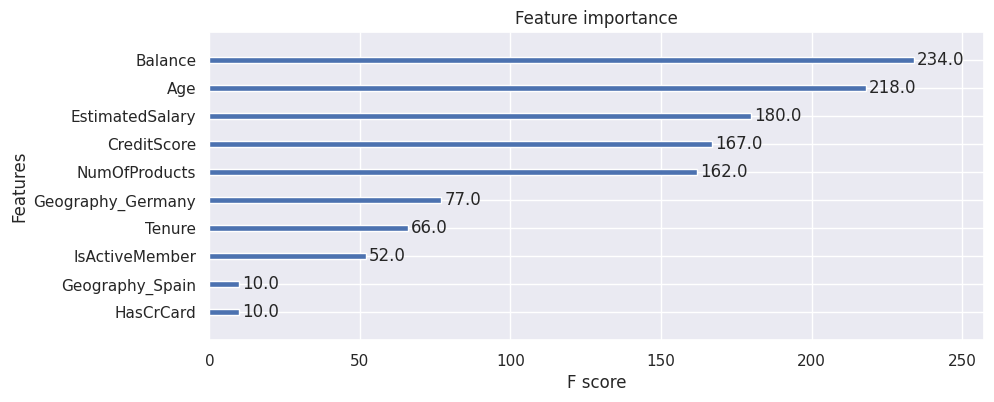

In [18]:
plot_importance(xgb_cv.best_estimator_);

## References

- https://developers.google.com/machine-learning/decision-forests/intro-to-gbdt
- https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting

